In [1]:
!pip install graphviz==0.10
!apt-get install graphviz

  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [2]:
#importando modulos mais usados
import pandas as pd
from sklearn.svm import LinearSVC
import numpy as np
#lib para impressão de grafico
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.dummy import DummyClassifier

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
data = pd.read_csv(uri)
data.head()

#para alterar o nome das colunas da tabela usamos:
#mapa para indicar qual coluna será renomeada e para qual nome
mapa = {
    "mileage_per_year": "milhas_por_ano",
    "model_year": "ano_do_modelo",
    "price": "preco",
    "sold": "vendido"
}

#comandos para renomear as "columns" baseado no que está no "mapa"
data = data.rename(columns = mapa)
data.head()

#para alterar valores trocando-os em um array ou conjunto de dados qualquer, podemos usar o comando "map" para isso
troca = {
    "yes": 1,
    "no": 0
}
#o comando map deve receber uma coluna à esquerda e um mapa para se basear à direita
data['vendido'] = data.vendido.map(troca)
data.head()

#queremos uma coluna com a idade do modelo
#faremos então o import de uma nova lib

#lib = datetime; function() = today(); atributo = year
actualYear = datetime.today().year
data['idade_do_modelo'] = actualYear - data.ano_do_modelo
data.head()

#trocaremos agora a coluna de milhas por km

data['km_por_ano'] = data.milhas_por_ano * 1.60934
data.head()

data = data.drop(columns = ['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'])
data.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [4]:
#separando dados
x = data[['preco', 'idade_do_modelo', 'km_por_ano']]
y = data['vendido']

SEED = 5
np.random.seed(SEED)

#recebe como params "dados x", "dados y" e o tamanho que o array de teste deve receber
#para controlar a aleatoriedade do metodo "train_test_split" podemos passar, como 3º param, antes de "test_size",
#um parametro de seed, onde o comando pode se basear para fazer o split
#podemos usar, também, o param "stratify" para controlar a proporcionalidade dos conjuntos de dados "x" e "y"
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, random_state = SEED, test_size = 0.25)
raw_train_x.head()

,preco,idade_do_modelo,km_por_ano
5474,11026.81,22,36445.11364
9663,95368.13,5,50711.91274
8489,11308.25,24,32384.74882
3294,79094.74,23,35674.23978
2297,40083.88,16,30212.13982


In [22]:
'''
scaler = StandardScaler()

scaler.fit(raw_train_x)

train_x = scaler.transform(raw_train_x)

test_x = scaler.transform(raw_test_x)
'''
#com esse model, ao tentar predizer qualquer coisa, o modelo cria, junto com a resposta da predição, um criterio de decisao
#esse criterio é gerado nos modelos da classe tree
#o param "max_depth=2" é para diminuir o tamanho do grafico plotado com o model após sua criação, usando a lib "graphviz"
model = DecisionTreeClassifier(max_depth=3)

model.fit(raw_train_x, train_y)

predictions = model.predict(raw_test_x)

acuracia = accuracy_score(test_y, predictions)

print(acuracia * 100)

78.75999999999999


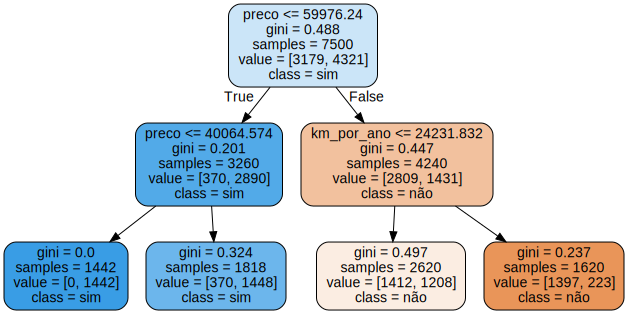

In [21]:
#para mostrar a arvore de decisoes do modelo criado, precisamos dessa lib
from sklearn.tree import export_graphviz
#com o "dot_data" retornado, criamos o grafico com essa lib
import graphviz

features = x.columns
#a lib que importamos retorna um "dot_data" que pode ser plotado na tela atraves dos comandos de graficos que ja vimos
dot_data = export_graphviz(model, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                           class_names = ['não', 'sim'])

#esse comando cria o grafico
graphviz.Source(dot_data)

#DECISION TREES N PRECISAO DE MUDAR ESCALA PARA FUNCIONAR BEM